## 활성화함수

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 계단함수

In [5]:
def step_func(x) :

    y = x > 0
    return np.array(y, dtype = int)

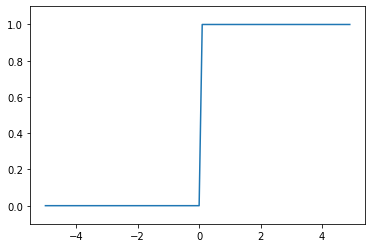

In [6]:
x = np.arange(-5., 5., 0.1)
y = step_func(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수

In [7]:
def sigmoid(x):

    return 1 / (1+np.exp(-x))

In [10]:
li = [-1., 1., 5.]
x = np.array(li)

sigmoid(x)

array([0.26894142, 0.73105858, 0.99330715])

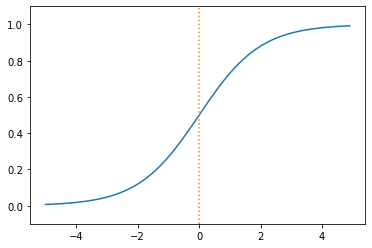

In [23]:
x = np.arange(-5., 5., .1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.plot([0,0],[-0.1,1.1], ':') # 가운데 점선 추가 
plt.show()

### 렐루함수

In [26]:
def relu(x):

    return np.maximum(0, x)

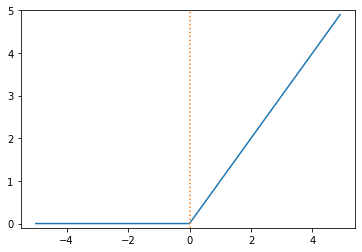

In [30]:
x = np.arange(-5., 5., .1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 5)
plt.plot([0,0],[-0.1,5], ':') # 가운데 점선 추가 
plt.show()

## 3층 신경망 구현

![image.png](image/1.png)

In [31]:
import numpy as np

def sigmoid(x):

    return 1 / (1+np.exp(-x))

def identity_func(x):
    
    return x


def init_parameters() :
    
    parameters = {}  # dic
    
    parameters['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])    # 2 * 3
    parameters['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 3 * 2
    parameters['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])              # 2 * 2    
    
    parameters['b1'] = np.array([0.1, 0.2, 0.3])       # 3    
    parameters['b2'] = np.array([0.1, 0.2])            # 2    
    parameters['b3'] = np.array([0.1, 0.2])            # 2    
    
    return parameters


def forward(parameters, x) :
    
    W1, W2, W3 = parameters['W1'], parameters['W2'], parameters['W3']
    b1, b2, b3 = parameters['b1'], parameters['b2'], parameters['b3']
    
    # 신경망
    
    # layer 1
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)        # 시그모이드 함수
    
    # layer 2
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    # output layer
    a3 = np.dot(z2, W3) + b3
    y  = identity_func(a3)  # 항등함수
    
    return y

In [32]:
# 실행
parameter = init_parameters()  
x = np.array([1.0, 0.5])

y= forward(parameter, x)
print(y)

[0.31682708 0.69627909]


## 소프트맥스 함수

In [34]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [35]:
sum_exp_a = np.sum(exp_a)  # 지수함수 합
sum_exp_a

74.1221542101633

In [36]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [38]:
def softmax(a) :

    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [39]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

### 오버플로 해결

In [41]:
# test
np.exp(np.log(2))

2.0

In [42]:
# 오버플로 문제
a = np.array([1010, 1000, 990])

softmax(a)

/var/folders/54/1kvtx3bn6v3c82sc7wg7yvdw0000gn/T/ipykernel_28021/3651283009.py:3: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/var/folders/54/1kvtx3bn6v3c82sc7wg7yvdw0000gn/T/ipykernel_28021/3651283009.py:5: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


array([nan, nan, nan])

In [44]:
# 오버플로 해결
c = np.max(a)  # 최대값
a - c

array([  0, -10, -20])

In [48]:
np.round(softmax(a-c), 4)

array([1., 0., 0.])

In [49]:
# 'x - 최대값'으로 다시 구현

def softmax(a) :

    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [50]:
a = np.array([1010, 1000, 990])

softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## 손글씨 숫자 인식

In [56]:
import sys
import os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

In [62]:
from dataset.mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

In [64]:
from PIL import Image

def img_show(img):
    
    pil_image = Image.fromarray(np.uint8(img))
    pil_image.show()
    
    
img   = x_train[0]
label = y_train[0]
label

5

In [65]:
img.shape

(784,)

In [67]:
img = img.reshape(28, 28)
img.shape

(28, 28)

In [68]:
img_show(img)

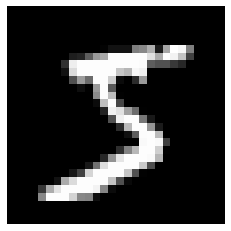

In [72]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()